In [1]:
"""
Script defining EvilMouDataSet Class and loaders to be used along with VAE model.
"""
import os, sys
import argparse
import numpy as np
import random
import torch
import time
import glob
from wfield import * #for loading wfield data in nice format
import torch
from torch.utils.data import Dataset, DataLoader
import h5py
from pathlib import Path
# import pickle
# import pandas as pd 


In [2]:
class EvilMouDataSet(torch.utils.data.Dataset):
    """
    Defines EvilMouDataSet to be used with VAE model.
    This is NOT efficient at all in terms of mem usage.
    You might wish to do something like having your dset be list of .h5 files
    And then in the __getitem__ method pick only file and corresponding slices you want.
    """
    def __init__(self, video_dir, wfield_dir, transform=None):
        self.df_video = np.load(video_dir)
        self.max_video     = np.max(self.df_video)
        self.min_video     = np.min(self.df_video)
        self.mean_video    = np.mean(self.df_video)
        #wfield_data        = mmap_dat(wfield_dir) 
        
        self.df_wfield     = np.load(wfield_dir)        
        self.max_wfield    = np.max(self.df_wfield)
        self.min_wfield    = np.min(self.df_wfield)
        self.mean_wfield   = np.mean(self.df_wfield)
        self.transform     = transform
        
    def __len__(self):
        """
        Returns number of samples in dset
        """
        
        return (int(self.df_wfield.shape[0]))
    
    def __getitem__(self, idx):
        """
        Returns a single sample from the two dsets.
        """
        frame_video = self.df_video[:, :, idx]
        video_data   = torch.from_numpy(frame_video)   # tensor of size [160, 120]
        
        frame_wfield = self.df_wfield[idx, :, :, :]
        wfield_data  = torch.from_numpy(frame_wfield)  # tensor of size [2, 540, 640]
        return video_data, wfield_data

In [45]:
import datetime
start_time = datetime.datetime.now()

# VIDEO_TRAINING_PATH = "/hdd/achint_files/musall_behavior/video_training_data.npy"
VIDEO_TRAINING_PATH = "/hdd/achint_files/musall_behavior/video_training_data_f32_normalized.npy"
# VIDEO_TEST_PATH     = "/hdd/achint_files/musall_behavior/video_test_data.npy"
VIDEO_TEST_PATH     = "/hdd/achint_files/musall_behavior/video_test_data_f32_normalized.npy"

# WFIELD_TRAINING_PATH = "/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_train_data.npy"
WFIELD_TRAINING_PATH = "/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_train_data_f32_normalized.npy"
# WFIELD_TEST_PATH     = "/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_test_data.npy"
WFIELD_TEST_PATH     = "/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_test_data_f32_normalized.npy"

# mouse_dataset = EvilMouDataSet(video_dir=VIDEO_TRAINING_PATH, wfield_dir=WFIELD_TRAINING_PATH)
mouse_dataset = EvilMouDataSet(video_dir=VIDEO_TEST_PATH, wfield_dir=WFIELD_TEST_PATH)
elapsed_time = datetime.datetime.now() - start_time
print("Elapsed Time: {}".format(elapsed_time))

Elapsed Time: 0:00:01.402771


In [51]:
mouse_dataset.df_video.shape

(160, 120, 17980)

In [29]:
mouse_dataset.df_video.dtype

dtype('float32')

In [30]:
print("Max of df_video: {} Max of df_wfield: {}".format(mouse_dataset.max_video, mouse_dataset.max_wfield))
print("Min of df_video: {} Min of df_wfield: {}".format(mouse_dataset.min_video, mouse_dataset.min_wfield))

print("df_video shape: {}".format(mouse_dataset.df_video.shape))
print("df_wfield shape: {}".format(mouse_dataset.df_wfield.shape))

Max of df_video: 268.5937805175781 Max of df_wfield: 1.0
Min of df_video: 20.1439151763916 Min of df_wfield: 0.020840009155413137
df_video shape: (160, 120, 17980)
df_wfield shape: (7825, 2, 135, 160)


In [31]:
df_video_normalized = np.true_divide((mouse_dataset.df_video - mouse_dataset.min_video), (mouse_dataset.max_video - mouse_dataset.min_video))

In [46]:
print("Max of df_video: {} Max of df_wfield: {}".format(np.max(df_video_normalized), mouse_dataset.max_wfield))
print("Min of df_video: {} Min of df_wfield: {}".format(np.min(df_video_normalized), mouse_dataset.min_wfield))

print("df_video shape: {}".format(mouse_dataset.df_video.shape))
print("df_wfield shape: {}".format(mouse_dataset.df_wfield.shape))

print("df_video_normalized datatype: {}".format(df_video_normalized.dtype))
print("mouse_dataset.df_wfield datatype: {}".format(mouse_dataset.df_wfield.dtype))

Max of df_video: 1.0 Max of df_wfield: 1.0
Min of df_video: 0.0 Min of df_wfield: 0.020840009674429893
df_video shape: (160, 120, 17980)
df_wfield shape: (7825, 2, 135, 160)
df_video_normalized datatype: float32
mouse_dataset.df_wfield datatype: float32


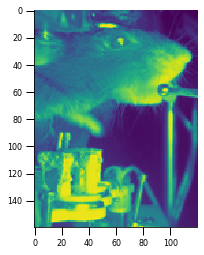

In [49]:
from matplotlib import pyplot as plt
plt.imshow(mouse_dataset.df_video[:, :, 0])

In [ ]:
df_video_normalized

In [35]:
np.save("/hdd/achint_files/musall_behavior/video_test_data_f32_normalized",df_video_normalized)

In [37]:
df_wfield_32 = mouse_dataset.df_wfield.astype(np.float32)

In [41]:
df_wfield_32.nbytes/1024/1024/1024

1.2592971324920654

In [44]:
np.save("/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_test_data_f32_normalized",df_wfield_32)

In [42]:
((mouse_dataset.df_wfield.nbytes/1024)/1024)/1024

2.518594264984131

In [20]:
((df_wfield_f32.nbytes/1024)/1024)/1024

5.036866664886475

In [3]:
# batch_size = 10
# VIDEO_PATH          = "/hdd/achint_files/musall_behavior"
# WFIELD_PATH         = "/hdd/achint_files/wfield_data/frames_2_540_640_uint16.dat"


# loaders_dict = EvilMouDataSet(video_dir=VIDEO_PATH,wfield_dir=WFIELD_PATH)


In [4]:
# WFIELD_TRAINING_PATH= "/hdd/achint_files/musall_behavior/wfield_train_data.npy"
# wfield_data        = np.load(WFIELD_TRAINING_PATH) 

In [ ]:
# import skimage.transform

# i_width = 135
# i_height = 160

# train_wfield = skimage.transform.resize(wfield_data, (2,i_width,i_height))

In [1]:
# from wfield import * #for loading wfield data in nice format
# file_path="/hdd/achint_files/wfield_data/frames_2_540_640_uint16.dat"
# data = mmap_dat(file_path)

In [27]:
# import skimage.transform 
# i_width = 135
# i_height = 160
# wfield_data =[]
# for i in range(len(data[:,0,0])):
#     resized_data= skimage.transform.resize(data[i], (2,i_width,i_height))
#     wfield_data.append(resized_data)

In [28]:
# np.shape(wfield_data)

(39123, 2, 135, 160)

In [40]:
# len_training = int(0.8*len(data[:,0,0]))
# wfield_data1=np.asarray(wfield_data) 
# training_data=(wfield_data1[:len_training,:,:,:])
# np.save("/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_train_data",training_data)

In [41]:
# test_data=(wfield_data1[len_training:,:,:,:])
# np.save("/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_test_data",test_data)

In [44]:
# traing=np.load("/hdd/achint_files/wfield_data/DOWNSAMPLED_wfield_train_data.npy")

In [45]:
# print(np.shape(traing))

(31298, 2, 135, 160)


In [38]:
# len_training = int(0.8*len(data[:,0,0]))

In [39]:
# len_training

31298

In [43]:
# np.shape(training_data)

(31298, 2, 135, 160)

In [34]:
# len_training = len(data[:,0,0])
# wfield_data[0,:,:,:]

TypeError: list indices must be integers or slices, not tuple

In [47]:
# for i,joint_data in enumerate(loaders_dict):
#         data1    = joint_data[0]
#         data1    = data1.float()
#         data2    = joint_data[1]
#         data2    = data2.float()
#         data1    = data1.to(device)
#         data2    = data2.to(device)
        
        #data1    = torch.unsqueeze(data1,0)
        #data2    = torch.unsqueeze(data2,0)
#     if i == 5:
#         print(data1.size())
#         print(data2.size())
#         data1    = data1.view(data1.size(0), -1)
#         data2    = data2.view(data2.size(0), -1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [58]:
# all_data = np.load("/hdd/achint_files/musall_behavior/video_data.npy")

In [75]:
#training_data=np.float32(all_data[:,:,:len_training])

In [77]:
#np.save("/hdd/achint_files/musall_behavior/video_training_data",training_data)

In [78]:
#test_data=np.float32(all_data[:,:,len_training:])

In [79]:
#np.save("/hdd/achint_files/musall_behavior/video_test_data",test_data)

In [62]:
#all_data.dtype

dtype('float64')

In [70]:
# len_training=int(0.8*len(all_data[0,0,:]))
# len_test = len(all_data[0,0,:])-len_training

In [4]:
# WFIELD_PATH         = "/hdd/achint_files/wfield_data/frames_2_540_640_uint16.dat"
# wfield_data        = mmap_dat(WFIELD_PATH)
# print(np.shape(wfield_data) )

(39123, 2, 540, 640)


In [11]:
# training_data=(wfield_data[:len_training,:,:])
# np.save("/hdd/achint_files/musall_behavior/wfield_train_data",training_data)

In [8]:
# len_training = int(0.8*len(wfield_data[:,0,0]))

In [9]:
# len_training

31298

In [ ]:
# len_training = int(0.8*len(wfield_data[:,0,0]))

In [10]:
# print(np.shape(wfield_data[:len_training,:,:]) )

(31298, 2, 540, 640)


In [12]:
# test_data=(wfield_data[len_training:,:,:])
# np.save("/hdd/achint_files/musall_behavior/wfield_test_data",test_data)